## MODELLING W PARTITIONING ALGORITHMS

In [1]:
# for data
import pandas as pd
import numpy as np

# for geospatial
import geopandas as gpd
import geojson

# for viz
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## DEF AND GLOBAL VARIABLES

In [2]:
# GLOBAL variables
CLEAN_PATH = '../data/clean' # transform this into temp file
FILE_TO_MODEL = 'all_data.geojson'

NAMES_DICT = {
    
    'build_gdf': 'bu_point',
    'arturo_gdf': 'qlity_mdl',
    'madrid_gdf': 'madrid_gdf'
}

MADRID_EPSG = 25830
STATE = 42

 OPENING DATA 


In [3]:
# Opening and naming of ALL DATA
madrid_gdf = gpd.read_file(f"{CLEAN_PATH}/{FILE_TO_MODEL}")
madrid_gdf.name = NAMES_DICT['madrid_gdf']
madrid_gdf.set_index('ID', inplace = True)

In [4]:
madrid_gdf.head()

n_BuildingUnits  n_Dwellings  nFloors_AG  nFloors_BG  ID_part  \
ID                                                                              
0002601VK4700A               16           16          10           0        4   
0002602VK4700A               16           16          10           0        4   
0002603VK4700A               16           16          10           0        4   
0002604VK4700A               16           16          10           0        4   
0002605VK4700A               16           16          10           0        4   

                area_m2c  area_m2p     train  land_use_mix  \
ID                                                           
0002601VK4700A      1809       199  0.300000      0.000235   
0002602VK4700A      1809       199  0.222222      0.000235   
0002603VK4700A      1809       199  0.285714      0.000227   
0002604VK4700A      1809       199  0.000000      0.000183   
0002605VK4700A      1809       199  0.000000      0.000141   

                closeness_small_parks  ...  currentUse_agriculture  \
ID                                     ...                           
0002601VK4700A             231.284766  ...                       0   
0002602VK4700A             228.583545  ...                       0   
0002603VK4700A             232.442433  ...                       0   
0002604VK4700A             235.336598  ...                       0   
0002605VK4700A             255.595757  ...                       0   

                currentUse_industrial  currentUse_office  \
ID                                                         
0002601VK4700A                      0                  0   
0002602VK4700A                      0                  0   
0002603VK4700A                      0                  0   
0002604VK4700A                      0                  0   
0002605VK4700A                      0                  0   

                currentUse_publicServices  currentUse_residential  \
ID                                                                  
0002601VK4700A                          0                       1   
0002602VK4700A                          0                       1   
0002603VK4700A                          0                       1   
0002604VK4700A                          0                       1   
0002605VK4700A                          0                       1   

                currentUse_retail  conditionOfConstruction_declined  \
ID                                                                    
0002601VK4700A                  0                                 0   
0002602VK4700A                  0                                 0   
0002603VK4700A                  0                                 0   
0002604VK4700A                  0                                 0   
0002605VK4700A                  0                                 0   

                conditionOfConstruction_functional  \
ID                                                   
0002601VK4700A                                   1   
0002602VK4700A                                   1   
0002603VK4700A                                   1   
0002604VK4700A                                   1   
0002605VK4700A                                   1   

                conditionOfConstruction_ruin                        geometry  
ID                                                                            
0002601VK4700A                             0  POINT (439951.830 4470056.850)  
0002602VK4700A                             0  POINT (439961.160 4470043.370)  
0002603VK4700A                             0  POINT (439970.490 4470029.880)  
0002604VK4700A                             0  POINT (439979.830 4470016.390)  
0002605VK4700A                             0  POINT (439989.160 4470002.910)  

[5 rows x 81 columns]

In [5]:
madrid_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 92522 entries, 0002601VK4700A to 9999720VK4799H
Data columns (total 81 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   n_BuildingUnits                     92522 non-null  int64   
 1   n_Dwellings                         92522 non-null  int64   
 2   nFloors_AG                          92522 non-null  int64   
 3   nFloors_BG                          92522 non-null  int64   
 4   ID_part                             92522 non-null  int64   
 5   area_m2c                            92522 non-null  int64   
 6   area_m2p                            92522 non-null  int64   
 7   train                               92522 non-null  float64 
 8   land_use_mix                        92522 non-null  float64 
 9   closeness_small_parks               92522 non-null  float64 
 10  residence_ratio                     92522 non-null  float64 
 11  blo

In [6]:
# columns

bool_cols = madrid_gdf.columns.tolist()[61:80]
num_cols = madrid_gdf.columns.tolist()[0:61]
geom_col = madrid_gdf.columns.tolist()[80]

mad_cols_df = num_cols + bool_cols

For the purpose of conparison, building_df is used in preprocessing

 At this points, there shouldn't be anything else to do to this data

## 1
### PREPROCESSING FOR NUMERIC COLUMNS

In this case, all features are **numeric**, since categorical feature have already been converted to dummies.
Therefore, only standization / normalization is needed

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standarization --> rescaling to mean == 0 and Std.Dev == 1

# cols to select
madrid_sc = scaler.fit_transform(madrid_gdf.reset_index()[num_cols])

In [8]:
# ADD BOOL COLS
madrid_sc = pd.concat([pd.DataFrame(madrid_sc, columns = num_cols), 
                       madrid_gdf.reset_index()[bool_cols]], axis = 1)

madrid_scaled = pd.DataFrame(madrid_sc)

madrid_scaled['ID'] = madrid_gdf.reset_index()['ID']
madrid_scaled.set_index('ID', inplace = True)

# madrid_scaled['geometry'] = madrid_gdf['geometry'] 
# add geometry if needed

display(madrid_scaled.head())
display(madrid_scaled.shape)

n_BuildingUnits  n_Dwellings  nFloors_AG  nFloors_BG  \
ID                                                                     
0002601VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002602VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002603VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002604VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002605VK4700A        -0.045885      0.16012    1.944412    -0.69189   

                 ID_part  area_m2c  area_m2p     train  land_use_mix  \
ID                                                                     
0002601VK4700A -0.200645  -0.03341 -0.139837 -0.455303     -0.490179   
0002602VK4700A -0.200645  -0.03341 -0.139837 -0.637199     -0.491000   
0002603VK4700A -0.200645  -0.03341 -0.139837 -0.488712     -0.525614   
0002604VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.705578   
0002605VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.878403   

                closeness_small_parks  ...  centuryOfConstr_21-01  \
ID                                     ...                          
0002601VK4700A              -0.047585  ...                      0   
0002602VK4700A              -0.060825  ...                      0   
0002603VK4700A              -0.041911  ...                      0   
0002604VK4700A              -0.027726  ...                      0   
0002605VK4700A               0.071572  ...                      0   

                currentUse_agriculture  currentUse_industrial  \
ID                                                              
0002601VK4700A                       0                      0   
0002602VK4700A                       0                      0   
0002603VK4700A                       0                      0   
0002604VK4700A                       0                      0   
0002605VK4700A                       0                      0   

                currentUse_office  currentUse_publicServices  \
ID                                                             
0002601VK4700A                  0                          0   
0002602VK4700A                  0                          0   
0002603VK4700A                  0                          0   
0002604VK4700A                  0                          0   
0002605VK4700A                  0                          0   

                currentUse_residential  currentUse_retail  \
ID                                                          
0002601VK4700A                       1                  0   
0002602VK4700A                       1                  0   
0002603VK4700A                       1                  0   
0002604VK4700A                       1                  0   
0002605VK4700A                       1                  0   

                conditionOfConstruction_declined  \
ID                                                 
0002601VK4700A                                 0   
0002602VK4700A                                 0   
0002603VK4700A                                 0   
0002604VK4700A                                 0   
0002605VK4700A                                 0   

                conditionOfConstruction_functional  \
ID                                                   
0002601VK4700A                                   1   
0002602VK4700A                                   1   
0002603VK4700A                                   1   
0002604VK4700A                                   1   
0002605VK4700A                                   1   

                conditionOfConstruction_ruin  
ID                                            
0002601VK4700A                             0  
0002602VK4700A                             0  
0002603VK4700A                             0  
0002604VK4700A                             0  
0002605VK4700A                             0  

[5 rows x 80 columns]

(92522, 80)

In [9]:
np.array(madrid_scaled.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 2
### PCA - DIMENSION REDUCTION

One problem of this dataset is the high number of features (80columns) because:
>- Makes the training very slow
>- Makes it difficult to find a good solution

This is known as the curse of dimensionality and the Dimensionality Reduction is the process of reducing the number of features to the most relevant ones in simple terms.

Reducing dimensionality does lose some information, however as most compressing processes it comes with some drawbacks, even though we get the training faster, we make the system perform slighly worse, but this is ok, because it can filter some of the noise and unnecesary details present in the dataset.

There are two main approaches to dimension reduction:
>- **PROJECTION**: PCA
>- **MANIFOLD LEARNING**: Relies on the hypothesis which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.

#### 2.1 Lets use PCA (Principal Component Analysis) to analyze the most sitable dimension for geodata features

This technique works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the dataset.

Drawbacks: 
>- It is highly influenced by outliers present in the data
>- It is a linear projection, which means it can't capture non-linear dependencies.

In [10]:
from sklearn.decomposition import PCA

geodata_pca = PCA().fit(madrid_scaled)

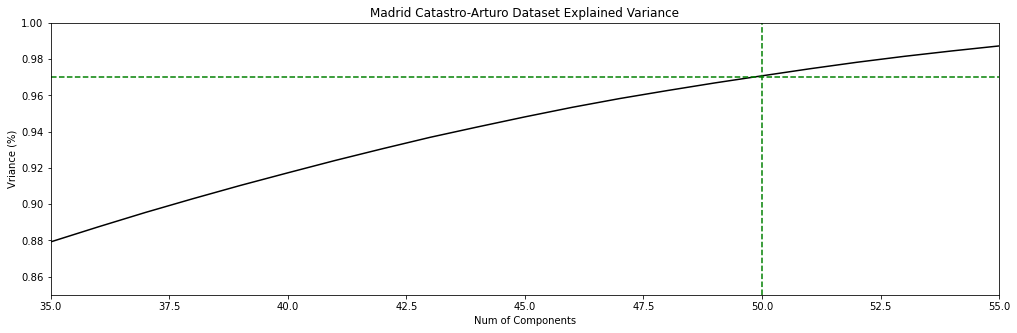

In [13]:
plt.figure(figsize=(17,5))
plt.plot(np.cumsum(geodata_pca.explained_variance_ratio_), c = 'k')
plt.axhline(0.97, ls = '--', c = 'g')
plt.axvline(50, ls = '--', c = 'g')

plt.xlabel('Num of Components')
plt.ylabel('Vriance (%)')
plt.title('Madrid Catastro-Arturo Dataset Explained Variance')

plt.ylim([0.85 ,1])
plt.xlim([35,55])
plt.show()

   The plot shows that selecting 50-55 components, I can preserve around 98-99% of the total variance of the data. It makes sence not to use the 100% of our variance, because it denotes all components and we want only the principal ones.

In [14]:
# Optimum analysis
geodata_pca = PCA(n_components = 45)
madrid_pca_gdf = geodata_pca.fit_transform(madrid_scaled)

In [15]:
madrid_pca = pd.DataFrame(madrid_pca_gdf)

madrid_pca['ID'] = madrid_gdf.reset_index()['ID']
madrid_pca.set_index('ID', inplace = True)

madrid_pca

0         1         2         3          4         5   \
ID                                                                            
0002601VK4700A -3.665107  1.737143  0.803052  4.481075   9.949189  4.158418   
0002602VK4700A -3.715196  1.747200  0.794428  4.483458   9.932698  4.148697   
0002603VK4700A -3.915814  1.937294  0.857190  4.539956   9.954601  4.506280   
0002604VK4700A -4.436636  2.423500  0.819654  4.868409  10.021548  4.865924   
0002605VK4700A -4.757889  2.788640  0.731576  5.230974  10.024178  5.340688   
...                  ...       ...       ...       ...        ...       ...   
9999716VK4799H -3.413367 -0.131136  0.092396  0.492745  -0.152385 -0.261059   
9999717VK4799H -3.430684 -0.112841  0.072188  0.469318  -0.168895 -0.264877   
9999718VK4799H -3.430684 -0.112841  0.072188  0.469318  -0.168895 -0.264877   
9999719VK4799H -3.430684 -0.112841  0.072188  0.469318  -0.168895 -0.264877   
9999720VK4799H -3.416675 -0.113185  0.079456  0.455379  -0.194675 -0.213266   

                      6         7         8         9   ...        35  \
ID                                                      ...             
0002601VK4700A  3.015537 -2.492206  0.323146 -2.699753  ...  0.294224   
0002602VK4700A  3.028320 -2.496671  0.310001 -2.706049  ...  0.255199   
0002603VK4700A  2.990245 -2.473239  0.213922 -2.647923  ...  0.230016   
0002604VK4700A  3.094389 -2.576280  0.085653 -2.283134  ...  0.163743   
0002605VK4700A  3.121865 -2.608800 -0.017562 -2.141486  ...  0.227189   
...                  ...       ...       ...       ...  ...       ...   
9999716VK4799H -1.558785 -0.577437 -0.322663 -0.739295  ... -0.530453   
9999717VK4799H -1.511954 -0.530026 -0.363358 -0.718786  ... -0.557434   
9999718VK4799H -1.511954 -0.530026 -0.363358 -0.718786  ... -0.557434   
9999719VK4799H -1.511954 -0.530026 -0.363358 -0.718786  ... -0.557434   
9999720VK4799H -1.441328 -0.501929 -0.371752 -0.693576  ... -0.615606   

                      36        37        38        39        40        41  \
ID                                                                           
0002601VK4700A  0.255149 -0.177579 -1.888101  0.352924 -0.539955 -1.315416   
0002602VK4700A  0.174962 -0.147957 -1.878983  0.340851 -0.456142 -1.370732   
0002603VK4700A  0.293490 -0.253261 -1.858161  0.383219 -0.507889 -1.384004   
0002604VK4700A  0.463148 -0.371757 -1.938208  0.390140 -0.089819 -1.575956   
0002605VK4700A  0.511656 -0.602773 -1.752287  0.504785 -0.119358 -1.556219   
...                  ...       ...       ...       ...       ...       ...   
9999716VK4799H  0.468422  0.990263 -0.034959 -0.324404 -0.249531 -0.225445   
9999717VK4799H  0.364868  0.927783 -0.017415 -0.347188 -0.209405 -0.265699   
9999718VK4799H  0.364868  0.927783 -0.017415 -0.347188 -0.209405 -0.265699   
9999719VK4799H  0.364868  0.927783 -0.017415 -0.347188 -0.209405 -0.265699   
9999720VK4799H  0.323100  0.952247 -0.014578 -0.395609 -0.245887 -0.252000   

                      42        43        44  
ID                                            
0002601VK4700A  0.269160 -0.285266  0.210623  
0002602VK4700A  0.275708 -0.366634  0.210041  
0002603VK4700A  0.232218 -0.267747  0.366978  
0002604VK4700A  0.238833 -0.481377  0.549835  
0002605VK4700A  0.287703 -0.478325  0.574602  
...                  ...       ...       ...  
9999716VK4799H -0.294243 -0.075285  0.535519  
9999717VK4799H -0.311106 -0.109565  0.573202  
9999718VK4799H -0.311106 -0.109565  0.573202  
9999719VK4799H -0.311106 -0.109565  0.573202  
9999720VK4799H -0.335035 -0.044793  0.664626  

[92522 rows x 45 columns]

#### 2.2 Lets use UMAP (Uniform Manifold Approximation and Projection)

Is a general-purpose manifold learning and dimension reduction algorithm created in 2018 by Leland McInnes, John Healy, James Melville. It is a nonlinear dimensionality reduction method and is very effective for visualizing clusters or groups of data points and their relative proximities.

It doesn't require PCA as a prior pre-processing step in the case of sparse matrices, like in the case of t-SNE, which is another -very similar- dim.red. method.

HYPERPARAMETERS that have an impact on the resulting embeddings:
>- **n_neighbors**: how balanced local vs. global structure in the data.
    * Low values: forces UMAP to focus on very local structures
    * High values: forces UMAP to focus on the larger neighbourhoods.

>- **min_dist**: controls how tightly UMAP is allowed to pack points together.
    * Low values: points will be clustered closely
    * High values: points will be clustered sparingly
    
>- **n_components**: determine the dimensionality of the reduced dimension space
>- **metric**: how distance is computed in the ambient space of the input data.

[link doc](https://umap-learn.readthedocs.io/en/latest/parameters.html?highlight=metric#metric)

In [16]:
import umap

reducer_geodata = umap.UMAP(random_state = STATE,
                            verbose = True,
                            learning_rate = 0.9, # tune
                            metric = 'correlation', # default euclidean
                            n_neighbors = 25,  # default 15
                            n_components = 10, # NON SCALED DATA 10 componentes losses around 0.02%
                            repulsion_strength = 1.25,
                            local_connectivity = 1.25, #local connectivity constraint ensures that we focus on the difference in distances among nearest neighbors rather than the absolute distance
                            min_dist = 0.001 # default 0.1 lower val for clustering
                            )

reducer_geodata.fit(madrid_scaled)
madrid_umap = reducer_geodata.transform(madrid_scaled)

# NOTES _________________
# Params with the most influence on this dataset:
# n_neighbors, n_components -> rely a lot on knowledge of the dataset
# min_dist -> makes the clustering 2D representation far more clearer
# metric -> cosine and euclidean give an error


UMAP(angular_rp_forest=True, learning_rate=0.9, local_connectivity=1.25,
     metric='correlation', min_dist=0.001, n_components=10, n_neighbors=25,
     random_state=42, repulsion_strength=1.25, verbose=True)
Construct fuzzy simplicial set
Mon Oct 19 19:10:53 2020 Finding Nearest Neighbors
Mon Oct 19 19:10:53 2020 Building RP forest with 20 trees
Mon Oct 19 19:10:55 2020 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Mon Oct 19 19:11:10 2020 Finished Nearest Neighbor Search
Mon Oct 19 19:11:14 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Oct 19 19:12:37 2020 Finished embedding


In [18]:
pd.DataFrame(madrid_umap).head()

0         1         2         3         4         5         6  \
0  8.221177  3.385404  7.925708  3.860189  7.529812  3.607713  1.678066   
1  8.223400  3.381926  7.932056  3.859675  7.533188  3.612451  1.676703   
2  8.220703  3.352443  7.954171  3.849288  7.516552  3.625074  1.686976   
3  8.224520  3.379153  7.936373  3.859182  7.535055  3.615790  1.676149   
4  8.224766  3.382900  7.933897  3.860836  7.536903  3.614161  1.674767   

          7         8          9  
0  2.645526  2.323782  11.336974  
1  2.648718  2.328385  11.331882  
2  2.659130  2.343819  11.330508  
3  2.650936  2.331691  11.328721  
4  2.649671  2.329611  11.329201

Text(0.5, 1.0, 'Geodata Embedding projection')

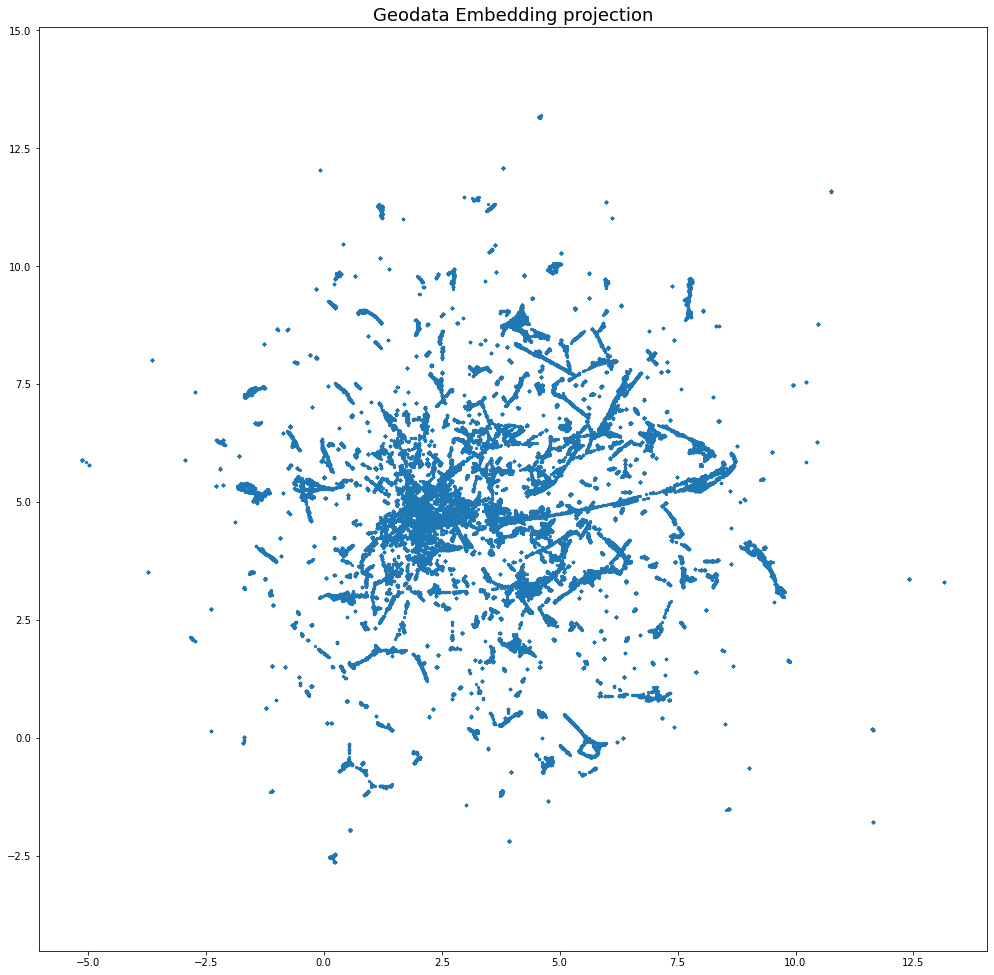

In [19]:
plt.figure(figsize = (17,17))
plt.scatter(x = madrid_umap[:, 0], 
            y = madrid_umap[:, 1], 
            s = 5)

plt.gca().set_aspect('equal', 'datalim')
plt.title('Geodata Embedding projection', fontsize=18)

## 3
### PARTITION CLUSTERING

### 3.1
#### KMEANS

Aims to partition the observations into a predifined number of clusters(k) in which each point belong to the cluster with the nearest mean. It starts by randomly selecting k centroinds ans assignin the points to the clustest cluster, then it updates each centroid with the mean of all points in the cluster.


**ELBOW METHOD**
In order to determine how many clusters are 

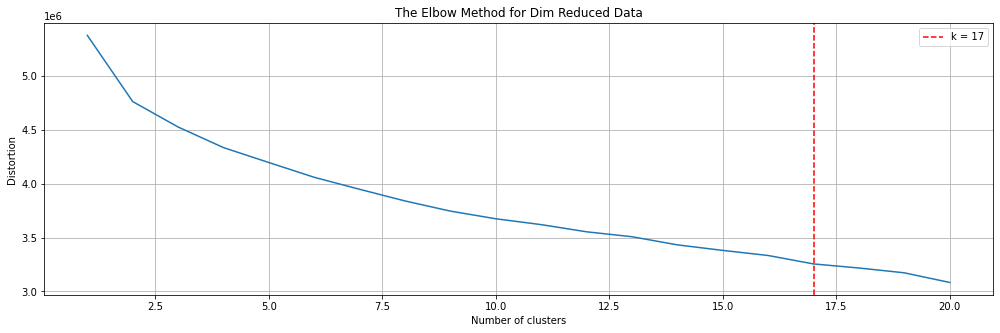

In [20]:
from sklearn.cluster import KMeans
max_k = 20

## make list with inertia
distortions = [] 
for i in range(1, max_k+1):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = STATE)
    model.fit(madrid_pca) # it is needed to standarized df 
    distortions.append(model.inertia_)
        
        
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)]\
            .index(min([i*100 for i in np.diff(distortions, 2)]))
## plot
fig, ax = plt.subplots(figsize = (17,5))

ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method for Dim Reduced Data', 
       xlabel='Number of clusters', 
       ylabel="Distortion")

ax.legend()
ax.grid(True)
plt.show()

# k == 13 for madrid_umap
# k == 15 for madrid_pca; 17
# k == 22 for madrid_scaled

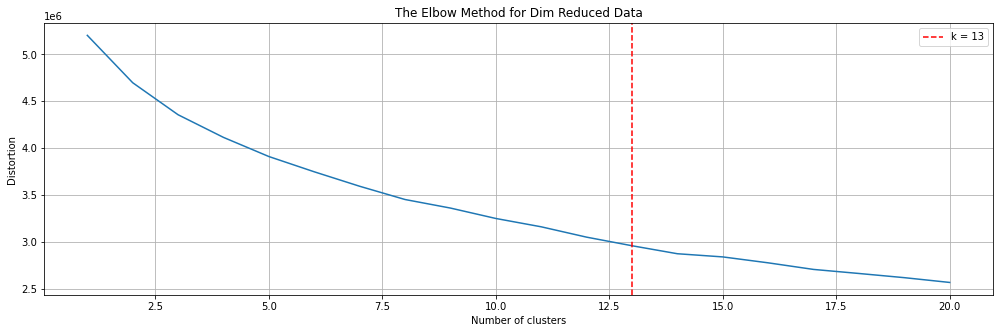

In [21]:
from sklearn.cluster import KMeans
max_k = 20

## make list with inertia
distortions = [] 
for i in range(1, max_k+1):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = STATE)
    model.fit(madrid_umap) # it is needed to standarized df 
    distortions.append(model.inertia_)
        
        
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)]\
            .index(min([i*100 for i in np.diff(distortions, 2)]))
## plot
fig, ax = plt.subplots(figsize = (17,5))

ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method for Dim Reduced Data', 
       xlabel='Number of clusters', 
       ylabel="Distortion")

ax.legend()
ax.grid(True)
plt.show()

# k == 13 for madrid_umap
# k == 16 for madrid_pca
# k == 22 for madrid_scaled
# 

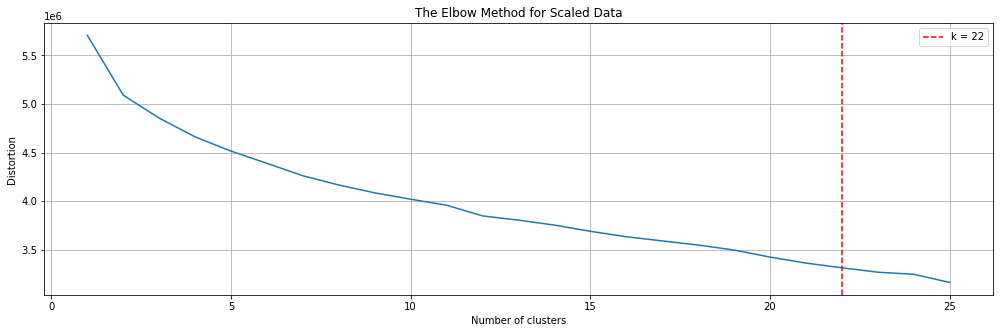

In [22]:
from sklearn.cluster import KMeans
max_k = 25

## make list with inertia
distortions = [] 
for i in range(1, max_k+1):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = STATE)
    model.fit(madrid_scaled) # it is needed to standarized df 
    distortions.append(model.inertia_)
        
        
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)]\
            .index(min([i*100 for i in np.diff(distortions, 2)]))
## plot
fig, ax = plt.subplots(figsize = (17,5))

ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method for Scaled Data', 
       xlabel='Number of clusters', 
       ylabel="Distortion")

ax.legend()
ax.grid(True)
plt.show()

# k == 9 for unscaled data

**METRIC**

Since thruth labels are known, the evaluation of the clustering is rather subjective because the evaluation must be performed using the model itself.

The metrics provided by sklearn without the need of *thruth labels* are:
1. SILHOUETTE SCORE: *For a higher score, the silhouette metric relates to a model with better defined clusters*.
>- The score is bounded between -1..+1 for highly dense clustering.
>- Scores around zero (0) indicate overlapping clusters.
>- The score is higher when clusters are dense and well separated, which relates to the standard concept of a cluster.
>- The silhouette coef. is higher for convex clusters than other concepts of clusters, such as density based clusters like DBSCAN.

2. CALINSKI-HARABASZ INDEX (Variance Ratio Criterion); *A higher score relates to a model with better defined clusters*.
>- The score is higher when clusters are dense and well separated, which related to a standard concept of a cluster
>- The silhouette coef. is higher for convex clusters than other concepts of clusters, such as density based clusters like DBSCAN.

3. DAVIES-BOULDIN INDEX: *A lower index relates to a model with a better separation between clusters*.
>- It compares the distance between clusters with the size of the clusters themselves
>- Zero is the lowest possible score. **The closers to zero the better**.

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics

## 1
### Fit with geodata_embedding
km_model_emb = KMeans(n_clusters = 7, 
                  random_state = STATE, 
                  max_iter = 1500, 
                  init = 'k-means++', 
                  n_init = 15
                 ).fit(madrid_umap) 

### Metrics
km_model_emb_var = metrics.calinski_harabasz_score(madrid_umap, km_model_emb.labels_)
display(km_model_emb_var)

km_model_emb_db = metrics.davies_bouldin_score(madrid_umap, km_model_emb.labels_)
display(km_model_emb_db)

6917.67333800222

2.052884705248018

In [34]:
## Silhouette Metric
km_model_emb_silh = metrics.silhouette_score(madrid_umap, km_model_emb.labels_, metric = 'correlation')
display(km_model_emb_silh)

0.15284304555229047

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics

### 2
### Fit with madrid_gdf
km_model = KMeans(n_clusters = 22, # k = 22 from the elbow method
                  random_state = STATE, 
                  verbose = False,
                  max_iter = 1500, 
                  init = 'k-means++', 
                  n_init = 25,
                  algorithm = 'auto'
                 ).fit(madrid_scaled)
### Metrics
km_model_var = metrics.calinski_harabasz_score(madrid_scaled, km_model.labels_)
display(km_model_var)

km_model_db = metrics.davies_bouldin_score(madrid_scaled, km_model.labels_)
display(km_model_db)

/home/lucia/miniconda3/envs/geoesp_env/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:310: RuntimeWarning: overflow encountered in multiply
  distances = - 2 * safe_sparse_dot(X, Y.T, dense_output=True)


3280.8736720740976

1.8390555841088128

In [73]:
## Silhouette Metric
km_model_silh = metrics.silhouette_score(madrid_scaled, km_model.labels_, metric = 'correlation')
display(km_model_silh)

0.13299387002105925

**CONCLUSIONS**

Silhouette score is better for the embedding model but overall it seems that the hole gdf performs better for the hole dataset which is odd.

**VISUALIZATION**

After choosing model, lets see the final result within the 2D embedding representation and the the static map

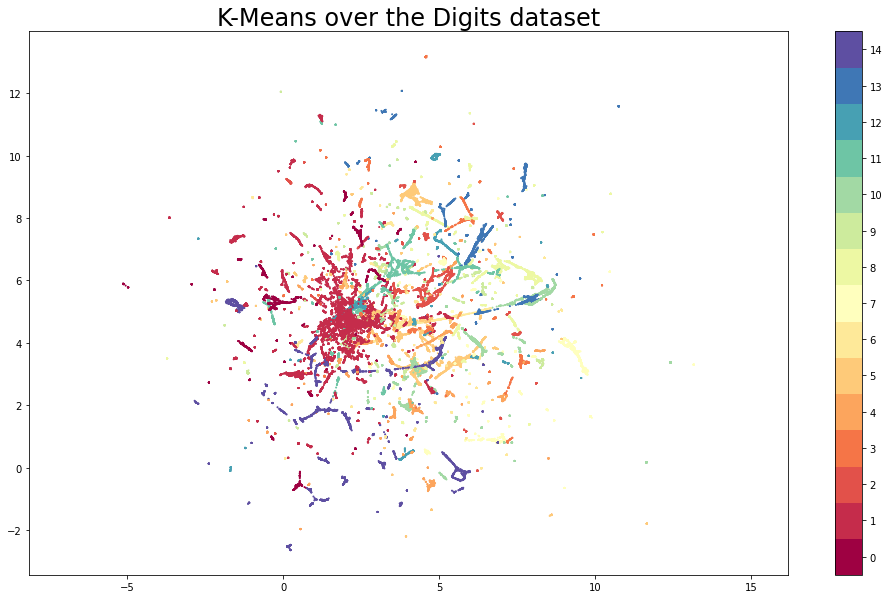

In [27]:
plt.figure(figsize = (17,10))

plt.scatter(madrid_umap[:, 0], 
            madrid_umap[:, 1], 
            c = km_model_emb.labels_, 
            cmap = 'Spectral', 
            s = 1)

plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries = np.arange(km_model_emb.n_clusters + 1) - 0.5)\
                            .set_ticks(np.arange(km_model_emb.n_clusters))

plt.title('K-Means over the Digits dataset', fontsize=24);

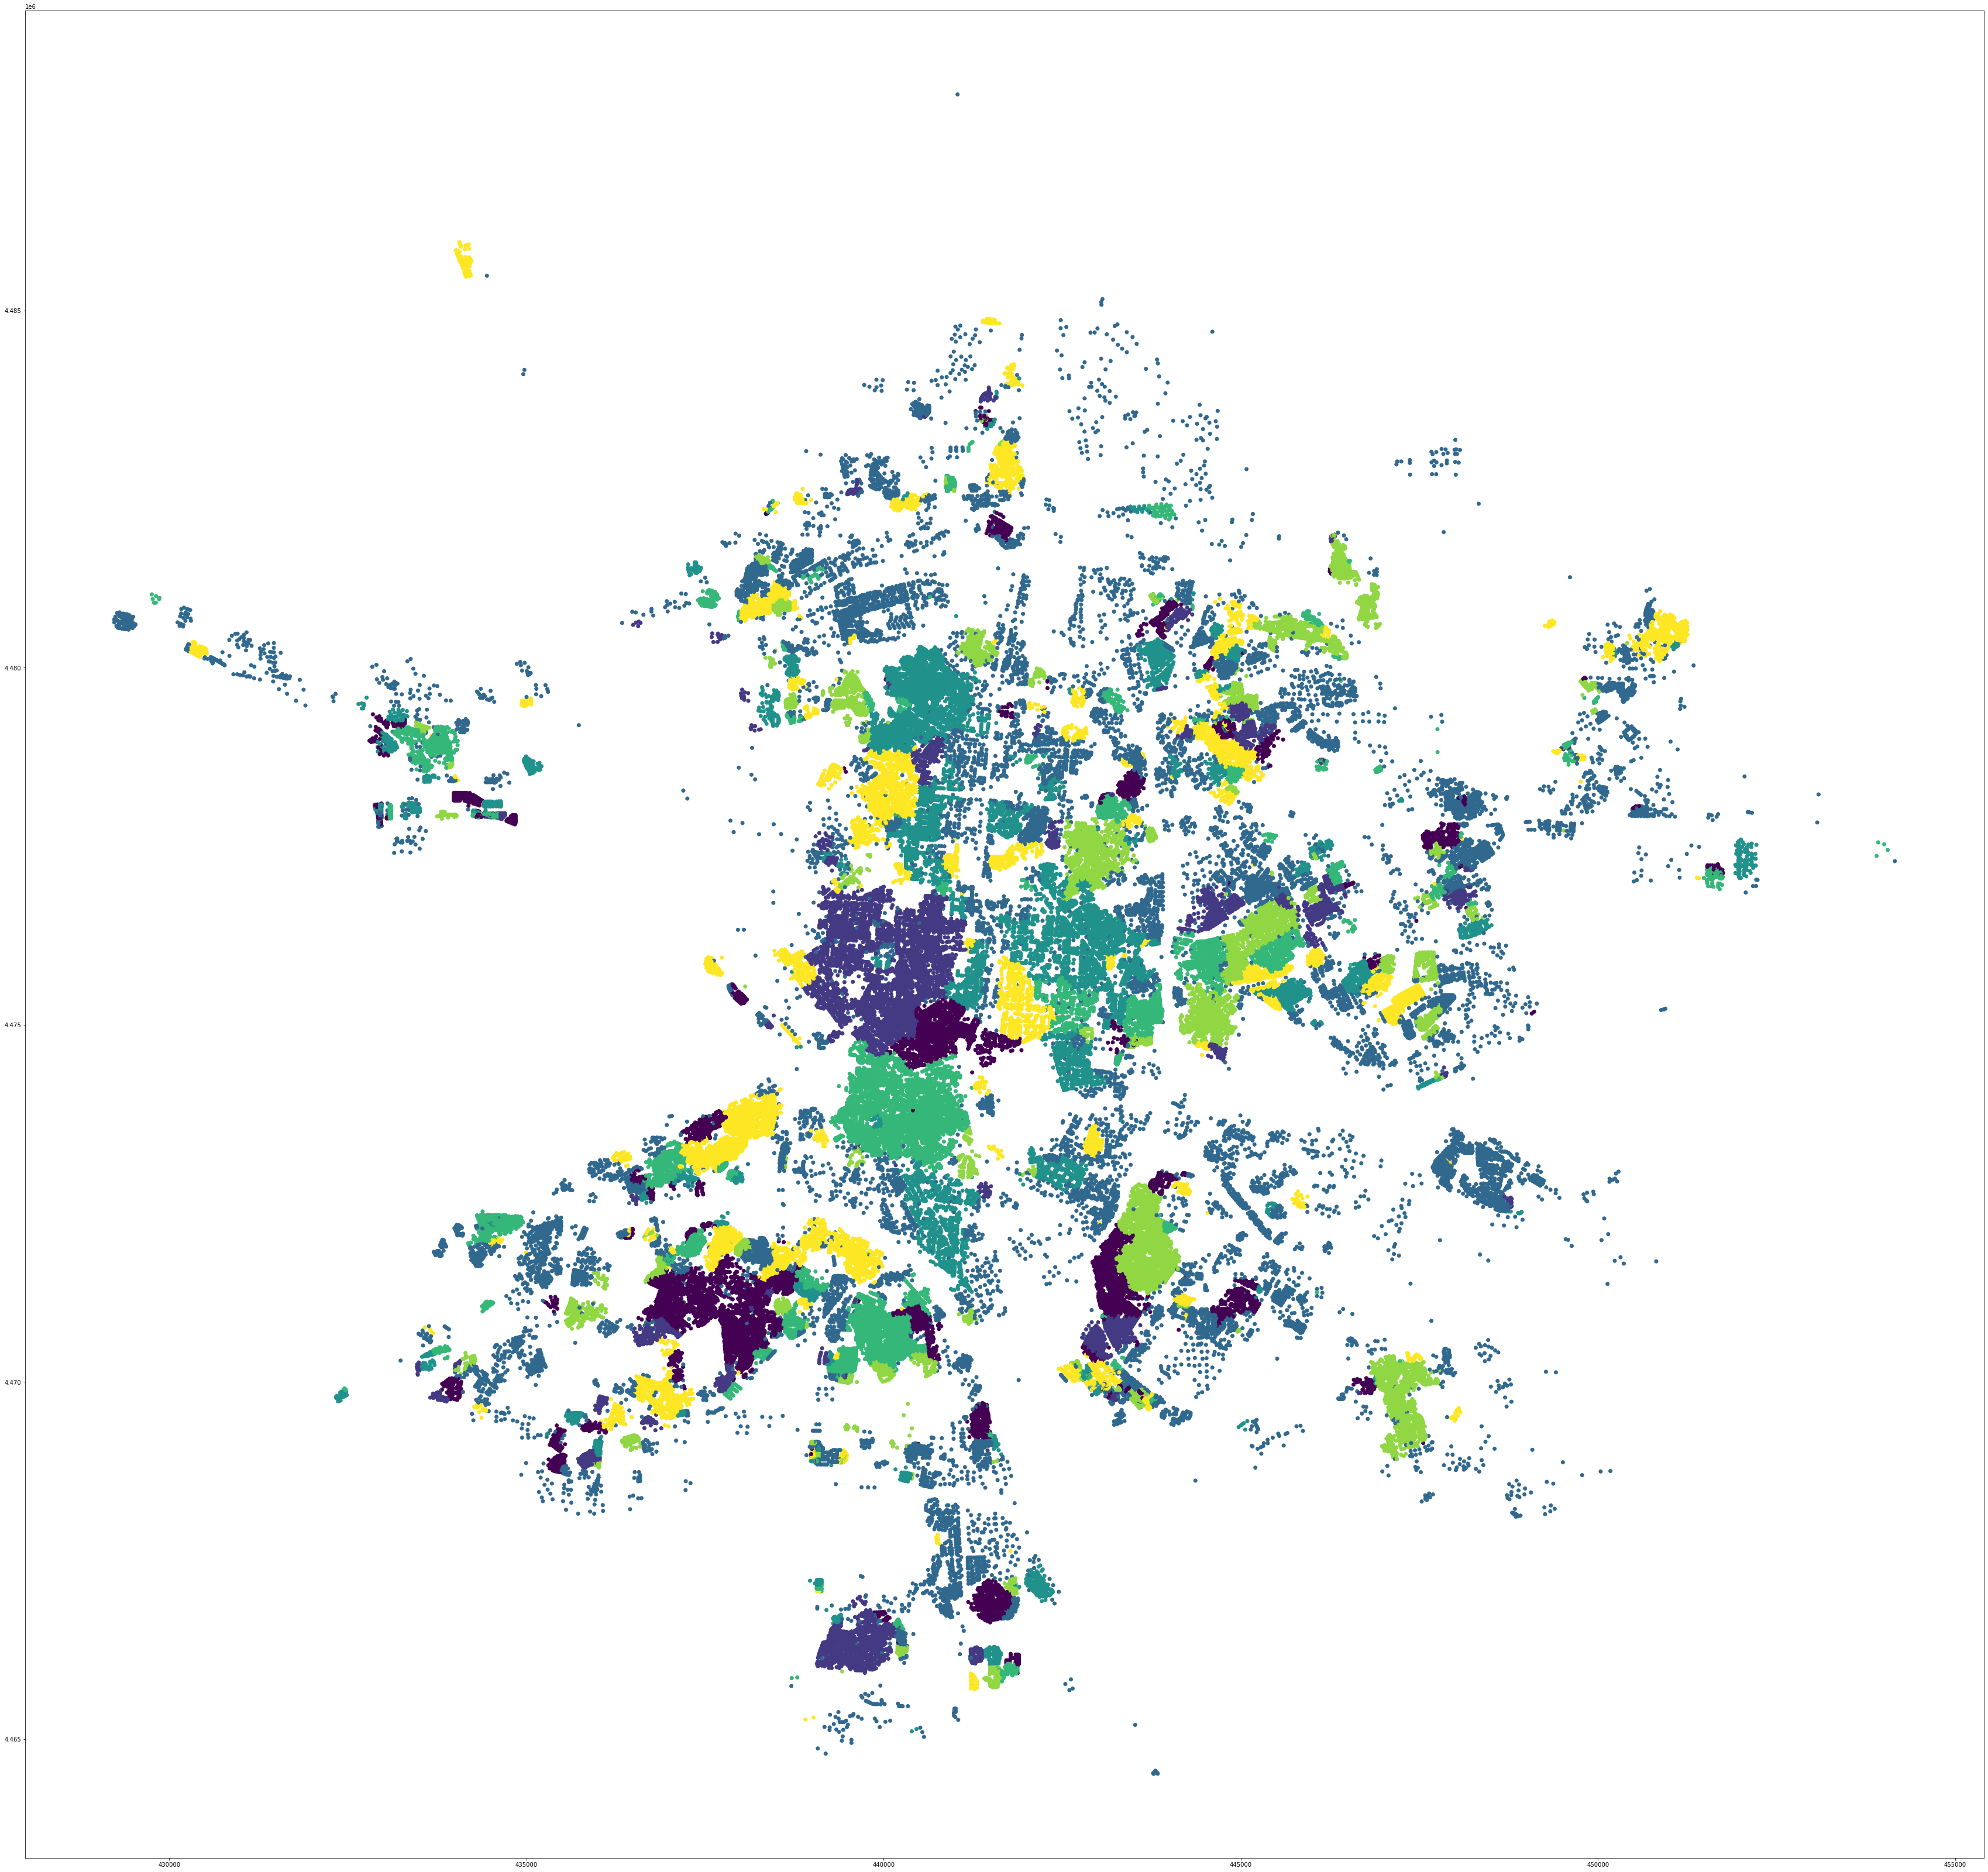

In [35]:
madrid_gdf['km_labels']= km_model_emb.labels_.tolist()

col_to_draw = 'km_labels' # col value corresponds grossfloorarea
madrid_gdf[['geometry', col_to_draw]].plot(figsize = (60,60), column = col_to_draw, legend = False)
plt.show()

### 3.2
#### KMENOIDS / CLARA

Its another partitioning method like KMeans. 
Medoid -> a point in the cluster that has minimum dissimilarities with all other points in the cluster.

Since KMenoids keeps failing lets pass to CLARA since its the version of KMenoids for large datasets
or CLARANS!

Big O O(k(n-k)^2) CLARA is more efficient that PAM

In [63]:
from pyclustering.cluster.clarans import clarans

# first lets implement the dataset as a list of lists
mad_lst = madrid_scaled.iloc[0:5000, :].values.tolist()

# clarans setup
clarans_instance = clarans(data = mad_lst, # list of tuples/lists representing objects
                           number_clusters = 7, # amount of clusters that should be allocated.
                           numlocal = 5, # amount of iterations for solving the problem
                           maxneighbor = 4) # neighbors examined

clarans_instance.process()

KeyboardInterrupt: 

In [136]:
clarans_clusters = clarans_instance.get_clusters() # Indexes of the points in each cluster
clarans_clusters

[]

### ANALYSIS OF RESULTS

Lets see how both algorithms have behaved

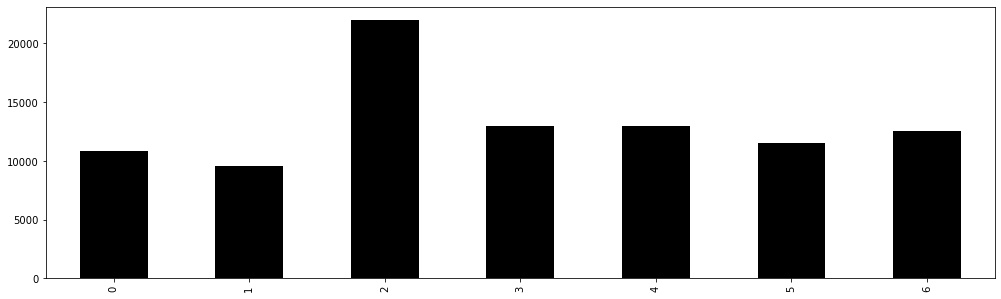

In [36]:
madrid_gdf['km_labels'].value_counts().sort_index().plot(kind = 'bar', 
                                                         figsize = (17,5),
                                                         color = 'k')
plt.show()

In [37]:
## Let's do another dataframe with scaled data in order to viz relevance of cols

madrid_labelled = pd.concat([madrid_scaled, madrid_gdf['km_labels']], axis = 1)
display(madrid_labelled.head())
display(madrid_labelled.shape)

n_BuildingUnits  n_Dwellings  nFloors_AG  nFloors_BG  \
ID                                                                     
0002601VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002602VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002603VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002604VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002605VK4700A        -0.045885      0.16012    1.944412    -0.69189   

                 ID_part  area_m2c  area_m2p     train  land_use_mix  \
ID                                                                     
0002601VK4700A -0.200645  -0.03341 -0.139837 -0.455303     -0.490179   
0002602VK4700A -0.200645  -0.03341 -0.139837 -0.637199     -0.491000   
0002603VK4700A -0.200645  -0.03341 -0.139837 -0.488712     -0.525614   
0002604VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.705578   
0002605VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.878403   

                closeness_small_parks  ...  currentUse_agriculture  \
ID                                     ...                           
0002601VK4700A              -0.047585  ...                       0   
0002602VK4700A              -0.060825  ...                       0   
0002603VK4700A              -0.041911  ...                       0   
0002604VK4700A              -0.027726  ...                       0   
0002605VK4700A               0.071572  ...                       0   

                currentUse_industrial  currentUse_office  \
ID                                                         
0002601VK4700A                      0                  0   
0002602VK4700A                      0                  0   
0002603VK4700A                      0                  0   
0002604VK4700A                      0                  0   
0002605VK4700A                      0                  0   

                currentUse_publicServices  currentUse_residential  \
ID                                                                  
0002601VK4700A                          0                       1   
0002602VK4700A                          0                       1   
0002603VK4700A                          0                       1   
0002604VK4700A                          0                       1   
0002605VK4700A                          0                       1   

                currentUse_retail  conditionOfConstruction_declined  \
ID                                                                    
0002601VK4700A                  0                                 0   
0002602VK4700A                  0                                 0   
0002603VK4700A                  0                                 0   
0002604VK4700A                  0                                 0   
0002605VK4700A                  0                                 0   

                conditionOfConstruction_functional  \
ID                                                   
0002601VK4700A                                   1   
0002602VK4700A                                   1   
0002603VK4700A                                   1   
0002604VK4700A                                   1   
0002605VK4700A                                   1   

                conditionOfConstruction_ruin  km_labels  
ID                                                       
0002601VK4700A                             0          5  
0002602VK4700A                             0          5  
0002603VK4700A                             0          5  
0002604VK4700A                             0          5  
0002605VK4700A                             0          5  

[5 rows x 81 columns]

(92522, 81)

In [38]:
more_important_cols = ['value', 'street_centrality_degree', 'residence_ratio', 'closeness_large_parks', 
                       'closeness_primary_roads', 'street_hierarchy_secondary', 'n_BuildingUnits', 
                       'nFloors_AG', 'centuryOfConstr_19-02', 'train', 'commerce_surface',                     
                       'age_deviation_diversity', 'leisure_density', 'housing_surface', 
                      'tertiary_roads_length',  'closeness_secondary_roads', 'average_quality', 
                       'average_age', 'centuryOfConstr_20-02', 'centuryOfConstr_21-01', 'anisotropicity', 
                       'street_hierarchy_primary', 'currentUse_residential', 
                      'conditionOfConstruction_functional', 'conditionOfConstruction_declined']


table_km_model = pd.pivot_table(madrid_labelled,
                                values = more_important_cols,
                                index = 'km_labels',
                                aggfunc = np.mean)

table_km_model

age_deviation_diversity  anisotropicity  average_age  \
km_labels                                                         
0                         0.148514       -0.282477    -0.124849   
1                         0.426841       -0.193860    -0.436183   
2                        -0.438627        0.718378     0.255224   
3                         0.028815       -0.150089     0.111482   
4                         0.353500       -0.283650    -0.393642   
5                        -0.286668       -0.227570     0.325594   
6                         0.182400       -0.211249    -0.013183   

           average_quality  centuryOfConstr_19-02  centuryOfConstr_20-02  \
km_labels                                                                  
0                 0.182912               0.066274               0.697625   
1                -0.320360               0.099584               0.568678   
2                -0.048995               0.004675               0.788726   
3                -0.303051               0.016825               0.622157   
4                -0.156626               0.155756               0.544838   
5                 0.408457               0.011827               0.716062   
6                 0.275314               0.027053               0.658367   

           centuryOfConstr_21-01  closeness_large_parks  \
km_labels                                                 
0                       0.069956               0.109158   
1                       0.042144               0.183857   
2                       0.110834              -0.142541   
3                       0.085664               0.034549   
4                       0.056211               0.003061   
5                       0.099748              -0.057814   
6                       0.081318               0.028988   

           closeness_primary_roads  closeness_secondary_roads  ...  \
km_labels                                                      ...   
0                         0.149017                   0.299339  ...   
1                         0.161307                   0.037907  ...   
2                        -0.374461                  -0.358641  ...   
3                         0.118707                  -0.194815  ...   
4                         0.067905                   0.187243  ...   
5                         0.111105                   0.297171  ...   
6                         0.109973                   0.077871  ...   

           leisure_density  nFloors_AG  n_BuildingUnits  residence_ratio  \
km_labels                                                                  
0                 0.189585   -0.228625        -0.177597        -0.047395   
1                 0.558322    0.174930        -0.048399         0.245827   
2                -0.452738    0.250550         0.411074        -0.168001   
3                -0.031558    0.121093        -0.045990         0.266356   
4                 0.690870   -0.044747        -0.144057         0.062005   
5                -0.237854   -0.249640        -0.162729        -0.120843   
6                -0.260474   -0.226867        -0.185505        -0.081986   

           street_centrality_degree  street_hierarchy_primary  \
km_labels                                                       
0                          0.273802                 -0.058175   
1                          0.097831                 -0.056052   
2                         -0.408751                  0.186942   
3                          0.169974                 -0.053453   
4                          0.111269                 -0.049171   
5                          0.072300                 -0.066259   
6                          0.048237                 -0.068061   

           street_hierarchy_secondary  tertiary_roads_length     train  \
km_labels                                                                
0                           -0.084106              -0.073031  0.102597   
1                           -0.007355              -0.148839  0.55

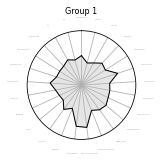

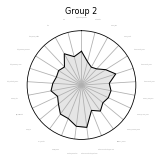

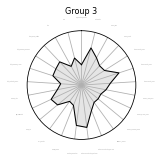

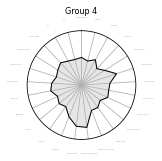

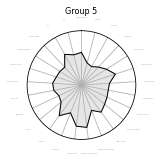

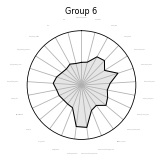

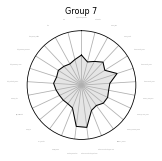

In [49]:
from math import pi 
   
def make_spider_plot(row, title, color):
    """
    Make custom polar plot for every label
    """
    # number of variable
    categories = table_km_model.columns.tolist()
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]    # first value to close the circular graph

    ########
    plt.figure(figsize = (2,2))
    ax = plt.subplot(1,1,1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size = 0)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(-1.75, 1.75)

    #######
    # We are going to plot the first line of the data frame.
    values = table_km_model.loc[row].values.flatten().tolist() 
    values += values[:1]  # first value to close the circular graph
        
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = color)
    ax.fill(angles, values, color = color, alpha=0.1) # Fill area
    
    #######
    # Add a title
    plt.title(title, size = 8, color = color, y = 1.1)
    plt.show()
    

for row in range(0, table_km_model.shape[0]):
    make_spider_plot(row = row, 
                     title = f'Group {row+1}',
                     color = 'k')

Lets merge all closing points

In [25]:
madrid_polygons = gpd.read_file(f"{CLEAN_PATH}/building_polygon.geojson")
madrid_polygons.set_index('ID')['geometry']

ID
000200100VK48E    POLYGON ((441657.574 4487050.292, 441658.164 4...
000200500VK56E    MULTIPOLYGON (((451584.920 4467181.410, 451586...
000205600VK56E    POLYGON ((451579.400 4467169.610, 451582.370 4...
000205700VK56E    POLYGON ((451576.440 4467163.260, 451576.930 4...
000205800VK56E    POLYGON ((451573.050 4467156.010, 451576.440 4...
                                        ...                        
9999717VK4799H    POLYGON ((449884.579 4479732.588, 449881.318 4...
9999718VK4799H    POLYGON ((449890.919 4479738.238, 449886.878 4...
9999719VK4799H    POLYGON ((449897.269 4479743.888, 449895.829 4...
9999720VK4799H    POLYGON ((449903.599 4479749.518, 449900.988 4...
RA610010000000    POLYGON ((446347.720 4481239.072, 446346.880 4...
Name: geometry, Length: 122153, dtype: geometry

In [37]:
np.array(madrid_labelled.columns)
# no 'geometry on sight'

array(['n_BuildingUnits', 'n_Dwellings', 'nFloors_AG', 'nFloors_BG',
       'ID_part', 'area_m2c', 'area_m2p', 'train', 'land_use_mix',
       'closeness_small_parks', 'residence_ratio', 'block_area',
       'intersection_density', 'anisotropicity', 'average_age',
       'age_diversity', 'age_deviation_diversity', 'built_density',
       'population_density', 'ocasional_density', 'proximity_density',
       'leisure_density', 'educational_density', 'nightlife_density',
       'culture_density', 'closeness_large_parks',
       'closeness_primary_roads', 'closeness_secondary_roads',
       'closeness_tertiary_roads', 'public_space_surface',
       'parks_surface', 'parking_surface', 'warehouse_surface',
       'commerce_surface', 'cultural_surface', 'industrial_surface',
       'industrial_rural_surface', 'sports_surface', 'hotel_surface',
       'garden_surface', 'office_surface', 'singular_surface',
       'religious_surface', 'spectacle_surface', 'housing_surface',
       'public_serv

In [40]:
madrid_labelled_polygons = gpd.GeoDataFrame(madrid_labelled,
                                            geometry = madrid_polygons.set_index('ID')['geometry'])

In [41]:
madrid_labelled_polygons.head()

n_BuildingUnits  n_Dwellings  nFloors_AG  nFloors_BG  \
ID                                                                     
0002601VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002602VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002603VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002604VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002605VK4700A        -0.045885      0.16012    1.944412    -0.69189   

                 ID_part  area_m2c  area_m2p     train  land_use_mix  \
ID                                                                     
0002601VK4700A -0.200645  -0.03341 -0.139837 -0.455303     -0.490179   
0002602VK4700A -0.200645  -0.03341 -0.139837 -0.637199     -0.491000   
0002603VK4700A -0.200645  -0.03341 -0.139837 -0.488712     -0.525614   
0002604VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.705578   
0002605VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.878403   

                closeness_small_parks  ...  currentUse_industrial  \
ID                                     ...                          
0002601VK4700A              -0.047585  ...                      0   
0002602VK4700A              -0.060825  ...                      0   
0002603VK4700A              -0.041911  ...                      0   
0002604VK4700A              -0.027726  ...                      0   
0002605VK4700A               0.071572  ...                      0   

                currentUse_office  currentUse_publicServices  \
ID                                                             
0002601VK4700A                  0                          0   
0002602VK4700A                  0                          0   
0002603VK4700A                  0                          0   
0002604VK4700A                  0                          0   
0002605VK4700A                  0                          0   

                currentUse_residential  currentUse_retail  \
ID                                                          
0002601VK4700A                       1                  0   
0002602VK4700A                       1                  0   
0002603VK4700A                       1                  0   
0002604VK4700A                       1                  0   
0002605VK4700A                       1                  0   

                conditionOfConstruction_declined  \
ID                                                 
0002601VK4700A                                 0   
0002602VK4700A                                 0   
0002603VK4700A                                 0   
0002604VK4700A                                 0   
0002605VK4700A                                 0   

                conditionOfConstruction_functional  \
ID                                                   
0002601VK4700A                                   1   
0002602VK4700A                                   1   
0002603VK4700A                                   1   
0002604VK4700A                                   1   
0002605VK4700A                                   1   

                conditionOfConstruction_ruin  km_labels  \
ID                                                        
0002601VK4700A                             0          5   
0002602VK4700A                             0          5   
0002603VK4700A                             0          5   
0002604VK4700A                             0          5   
0002605VK4700A                             0          5   

                                                         geometry  
ID                                                                 
0002601VK4700A  POLYGON ((439955.100 4470064.271, 439956.091 4...  
0002602VK4700A  POLYGON ((439964.441 4470050.782, 439965.421 4...  
0002603VK4700A  POLYGON ((439973.767 4470037.299, 439974.761 4...  
0002604VK4700A  POLYGON ((439983.104 4470023.815, 439984.090 4...  
0002605VK4700A  POLYGON ((439992.432 4470010.333, 439993.421 4...  

[5 rows x 

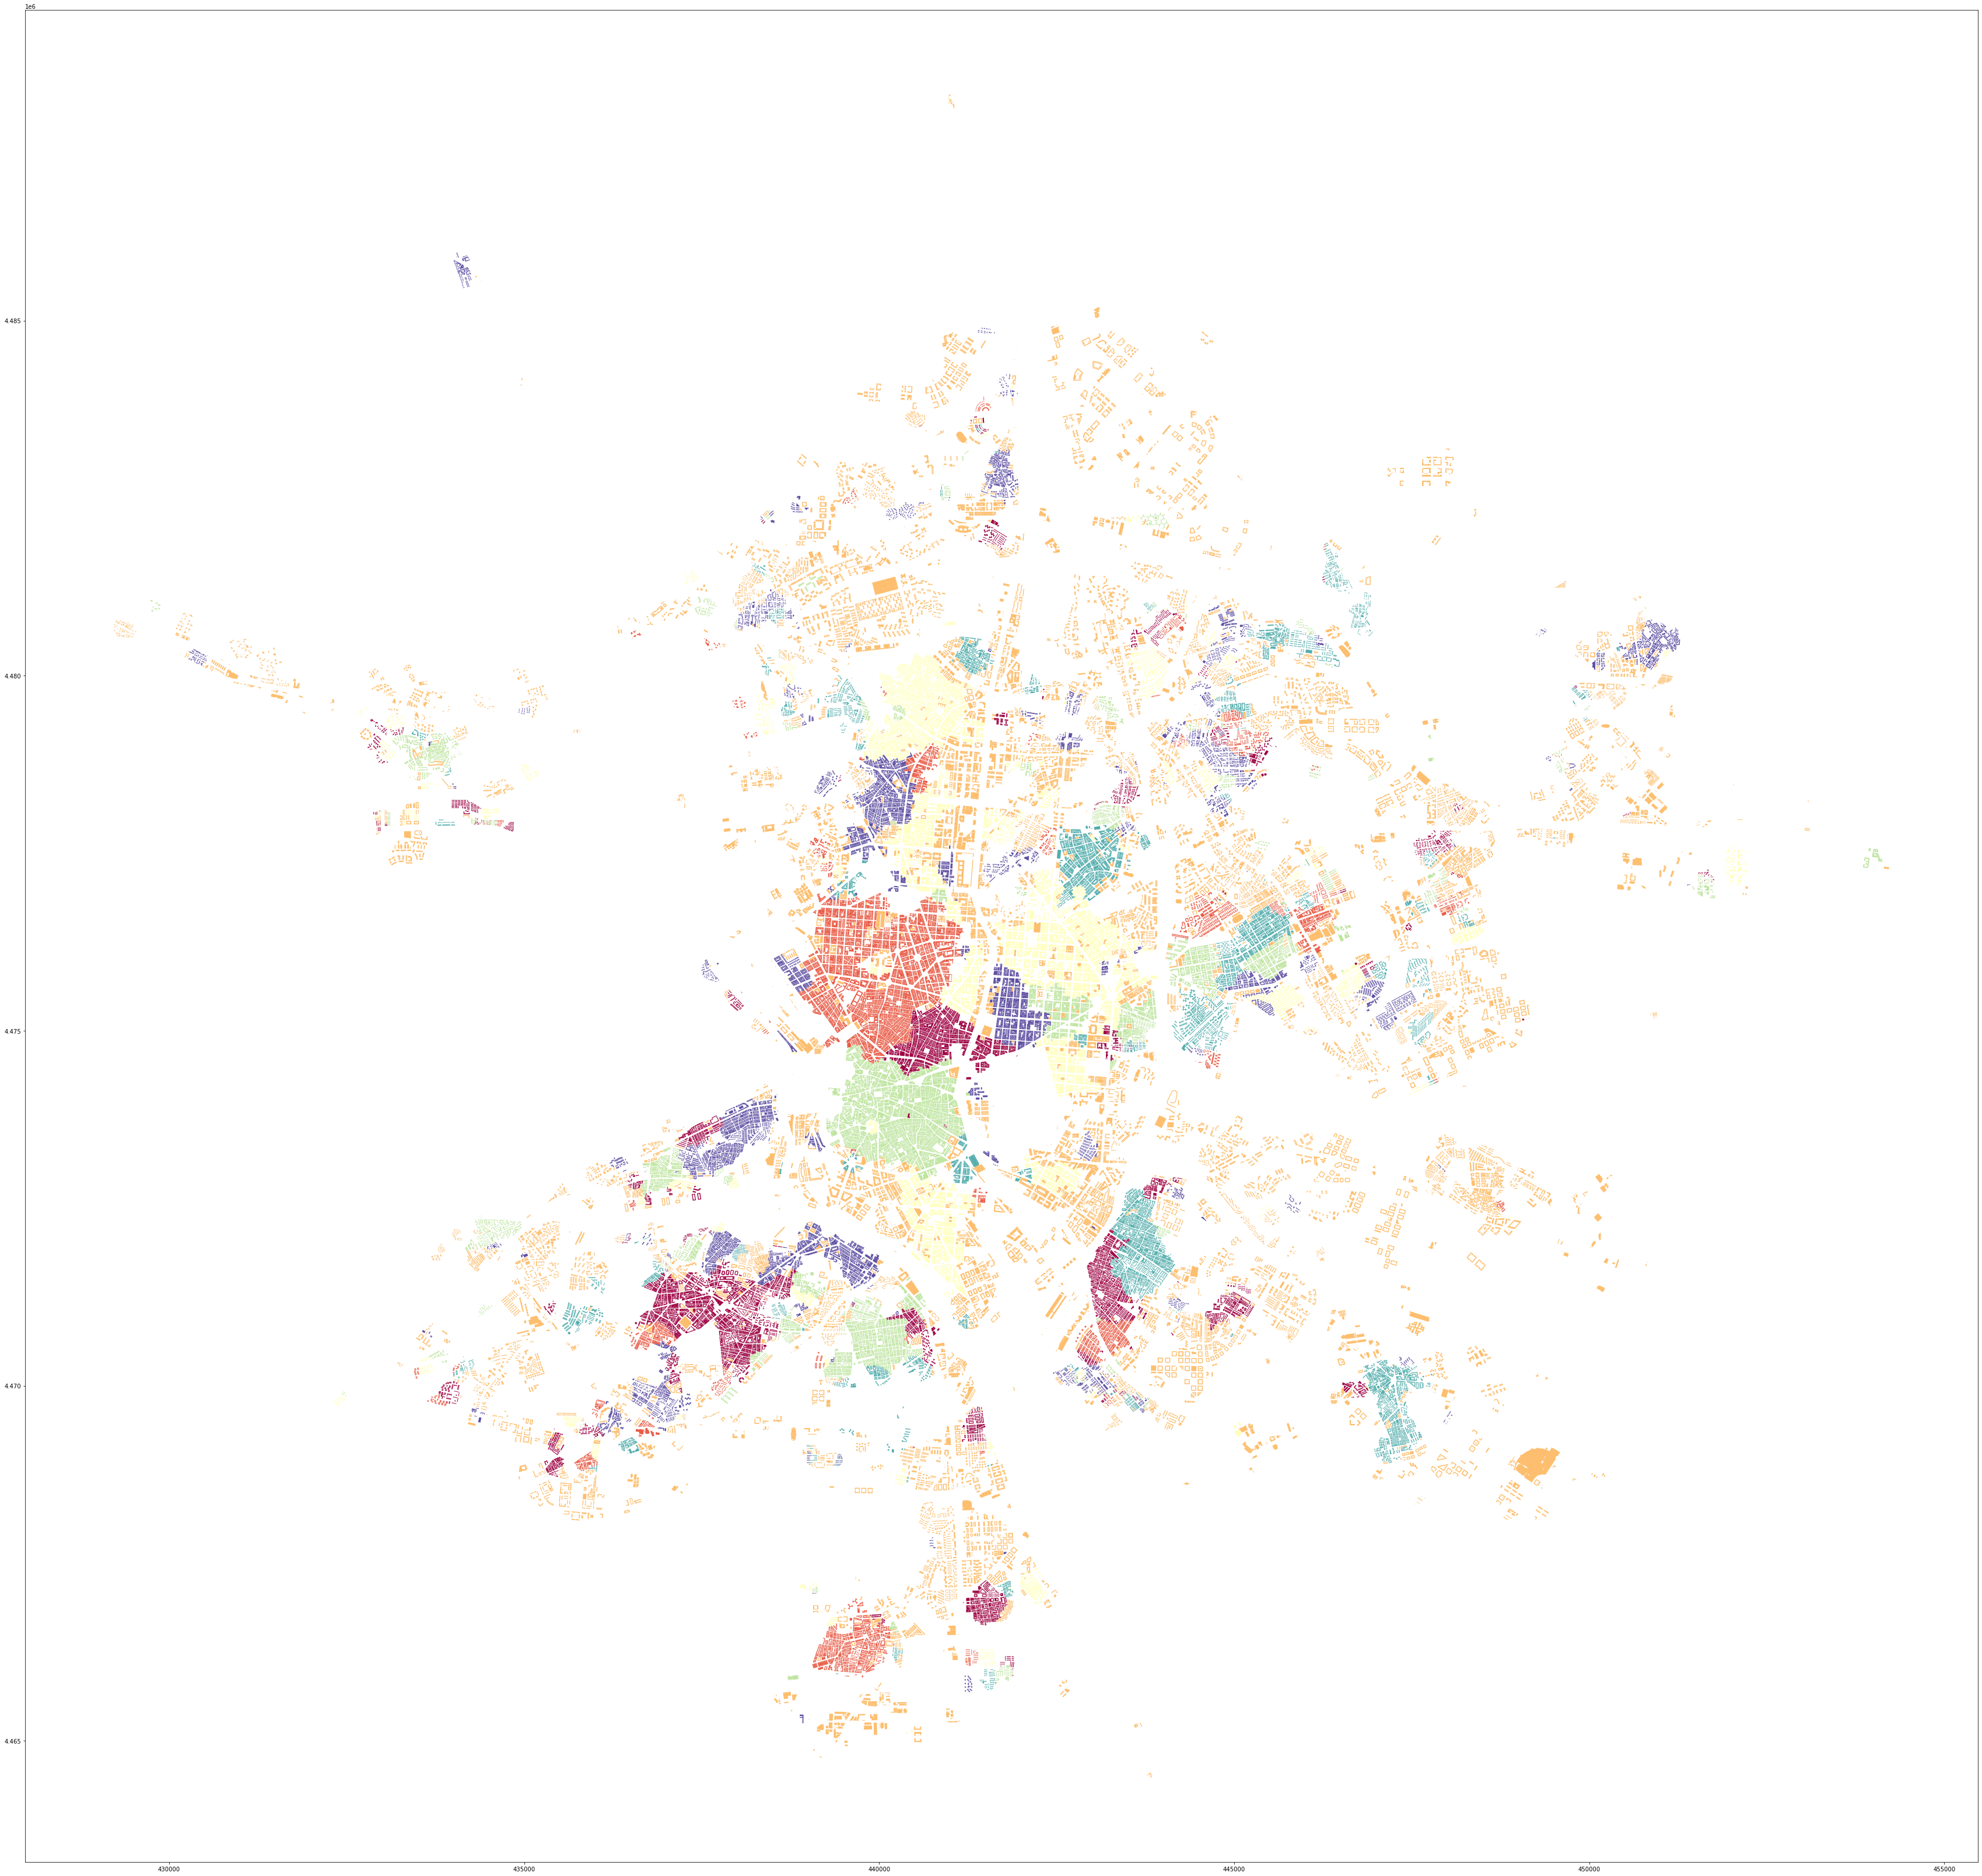

In [42]:
col_to_draw = 'km_labels'

madrid_labelled_polygons[['geometry', col_to_draw]].plot(figsize = (60,60), 
                                                         column = col_to_draw, 
                                                         legend = False, 
                                                         cmap = 'Spectral')
plt.show()

In [44]:
def dissolve(gdf):
    return gdf.unary_union

table = madrid_labelled_polygons['geometry'].groupby(madrid_labelled_polygons['km_labels']).apply(dissolve)
table

KeyboardInterrupt: 

In [ ]:
table[0]